In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [2]:
data = pd.read_csv("data/Most Streamed Spotify Songs 2024.csv", encoding="unicode_escape")
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [3]:
data.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [4]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [12]:
data_edited = data.copy()
data_edited.columns = data_edited.columns.str.lower()
data_edited.columns = data_edited.columns.str.replace(" ", "_")
data_edited.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [18]:
data_edited.artist.unique()

array(['Tommy Richman', 'Kendrick Lamar', 'Artemas', ..., 'Kerim Araz',
       'Jaques Raupï¿', 'BUSHIDO ZHO'], dtype=object)

In [20]:
print("Count of unique artists:")
len(data_edited.artist.unique())

Count of unique artists:


2000

In [22]:
print("artists with the the number of songs:")
data_edited.artist.value_counts()

artists with the the number of songs:


artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64

In [24]:
print("Top 5 artists with the most songs:")
top_5_artists = data_edited.artist.value_counts().head(5)
top_5_artists

Top 5 artists with the most songs:


artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 artists with the most songs')

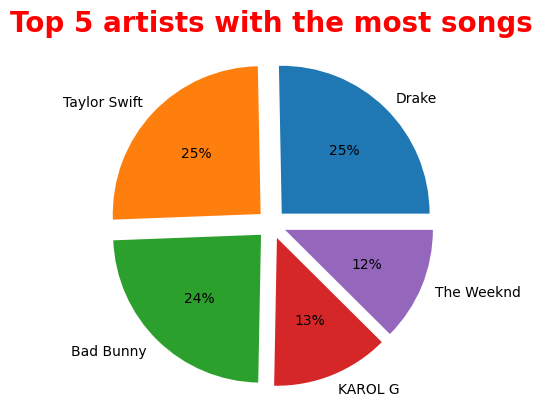

In [59]:
plt.pie(top_5_artists, labels=top_5_artists.index, autopct="%.f%%", explode=[0.1, 0.1, 0.1, 0.1, 0.1])
plt.title("Top 5 artists with the most songs", fontsize=20, color="red", fontweight="bold")

Text(0, 0.5, 'Number of songs')

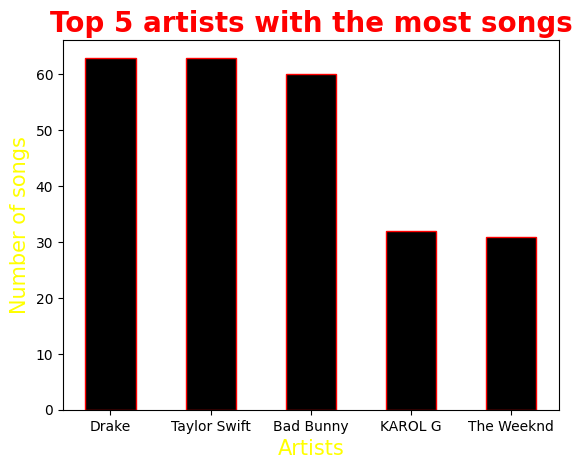

In [72]:
plt.bar(top_5_artists.index, top_5_artists, color="black", edgecolor="red", width=0.5)
plt.title("Top 5 artists with the most songs", color="red", fontsize=20, fontweight="bold")
plt.xlabel("Artists", color="yellow", fontsize=15)
plt.ylabel("Number of songs", color="yellow", fontsize=15)


### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [81]:
data_edited.columns.unique() # spotify_streams

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [115]:
data_edited.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

In [122]:
data_edited.spotify_streams = data_edited.spotify_streams.str.replace(",", "").astype(float) # remove the comma and convert the column to float

AttributeError: Can only use .str accessor with string values!

In [123]:
data_edited_sorted_by_spotify_stream = data_edited.sort_values("spotify_streams", ascending=False)
data_edited_top_5_spotify_stream =  data_edited_sorted_by_spotify_stream[['artist', 'spotify_streams']].drop_duplicates(subset='artist').head(5) # drop_duplicates(subset='artist') to get the top 5 artists without the duplicates
data_edited_top_5_spotify_stream

,artist,spotify_streams
55,The Weeknd,4.281469e+09
4254,xSyborg,4.261328e+09
53,Ed Sheeran,3.909459e+09
132,Lewis Capaldi,3.427499e+09
114,Post Malone,3.358704e+09


In [125]:
data_edited.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams               float64
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

Text(0, 0.5, 'Spotify Streams')

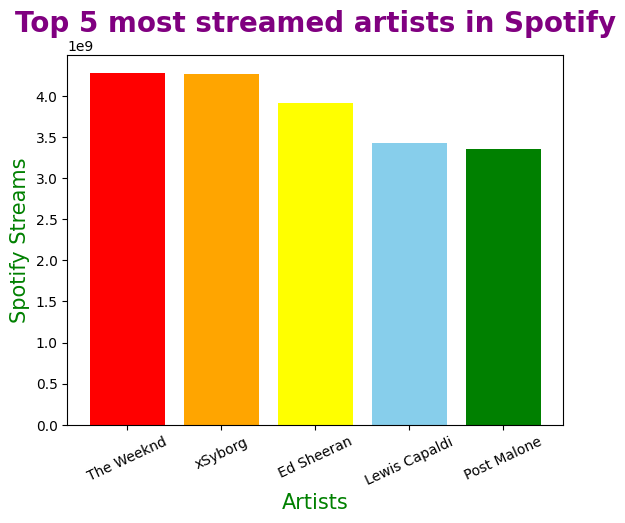

In [146]:
plt.bar(data_edited_top_5_spotify_stream.artist, data_edited_top_5_spotify_stream.spotify_streams, color=['red', 'orange', 'yellow', 'skyblue', 'green'])
plt.title("Top 5 most streamed artists in Spotify", fontsize=20, color="purple", fontweight="bold")
plt.xlabel("Artists", fontsize=15, color="green")
plt.xticks(rotation=25)
plt.ylabel("Spotify Streams", fontsize=15, color="green")

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [151]:
data_edited.release_date = pd.to_datetime(data_edited.release_date)
data_edited.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                         object
track_score                          float64
spotify_streams                      float64
spotify_playlist_count                object
spotify_playlist_reach                object
spotify_popularity                   float64
youtube_views                         object
youtube_likes                         object
tiktok_posts                          object
tiktok_likes                          object
tiktok_views                          object
youtube_playlist_reach                object
apple_music_playlist_count           float64
airplay_spins                         object
siriusxm_spins                        object
deezer_playlist_count                float64
deezer_playlist_reach                 object
amazon_pla

In [152]:
data_edited["year"] = data_edited.release_date.dt.year

In [153]:
data_edited.release_date

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: release_date, Length: 4600, dtype: datetime64[ns]

In [154]:
data_edited.year

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: year, Length: 4600, dtype: int32

In [155]:
data_edited["month"] = data_edited.release_date.dt.month

In [156]:
data_edited.month

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: month, Length: 4600, dtype: int32

In [158]:
data_edited.columns.unique()

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track', 'year', 'month'],
      dtype='object')

In [161]:
print("Number of songs released by year:")
data_edited.year.value_counts()

Number of songs released by year:


year
2023    1158
2022     694
2024     693
2021     408
2020     360
2019     296
2018     249
2017     213
2016     123
2015      96
2014      70
2013      55
2011      51
2012      47
2010      27
2009      15
2008      11
2005       5
2004       5
2002       5
2007       5
2003       3
2006       3
2000       2
1994       1
1999       1
1987       1
1998       1
2001       1
1991       1
Name: count, dtype: int64

In [162]:
print("Number of songs released by month:")
data_edited.month.value_counts()

Number of songs released by month:


month
5     511
1     503
3     430
4     420
6     395
10    384
2     371
11    350
9     328
7     321
8     315
12    272
Name: count, dtype: int64

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

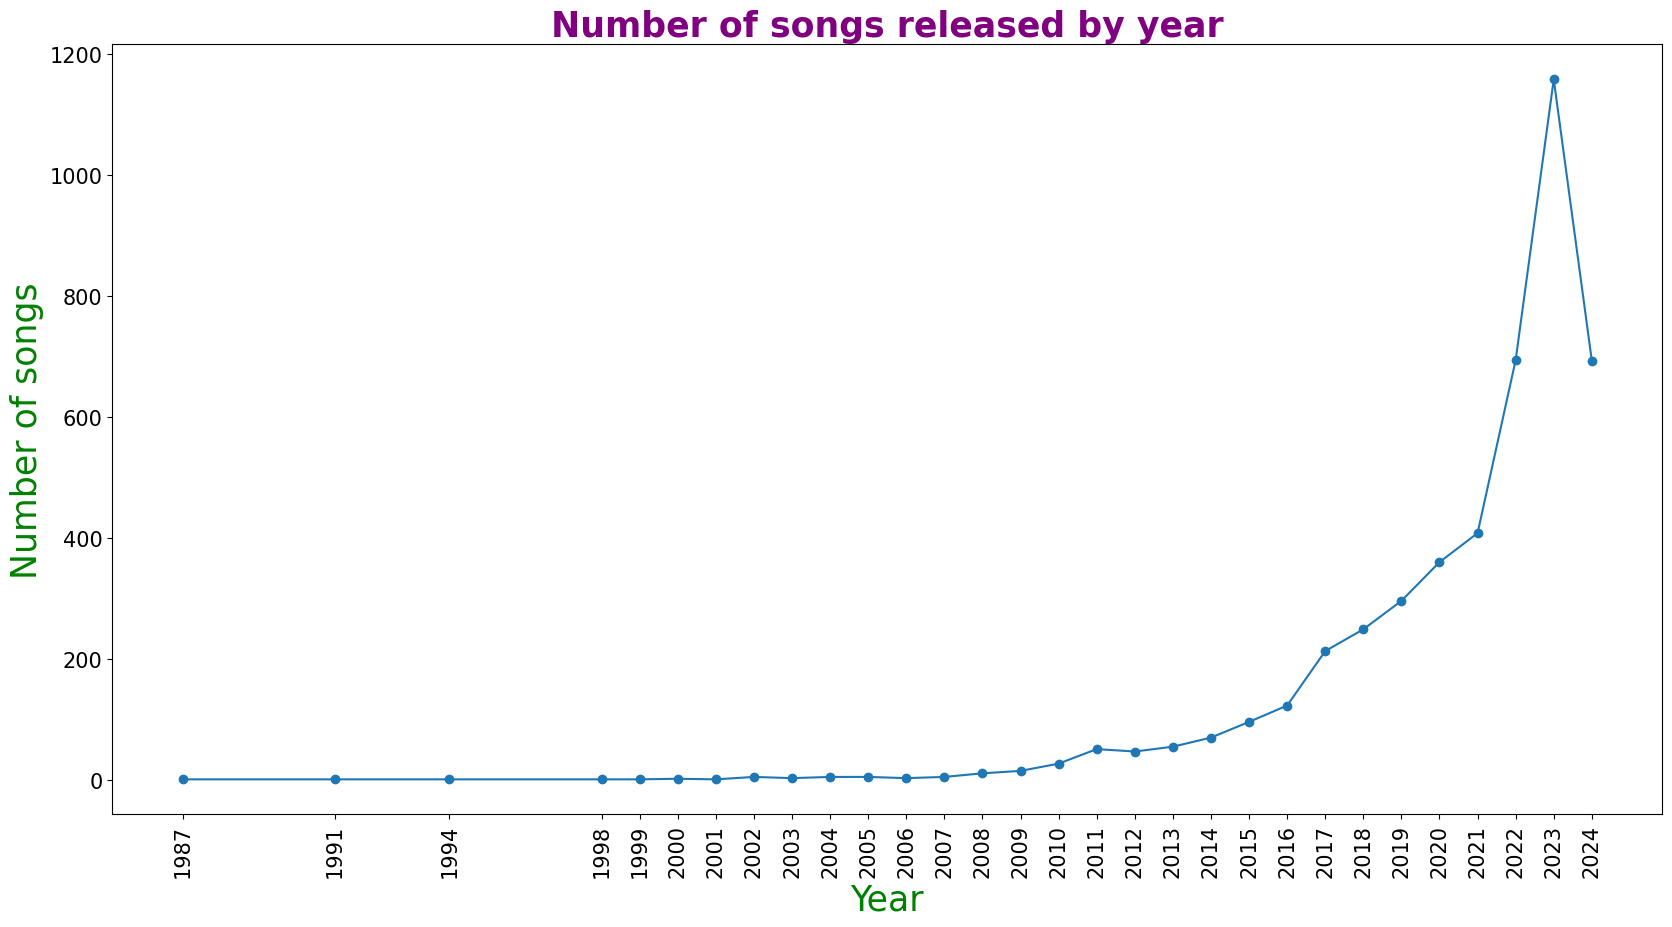

In [197]:
plt.figure(figsize=(20, 10))
plt.plot(data_edited.year.value_counts().sort_index(), marker="o")
plt.title("Number of songs released by year", fontsize=25, color="purple", fontweight="bold")
plt.xlabel("Year", fontsize=25, color="green")
plt.ylabel("Number of songs", fontsize=25, color="green")
plt.xticks(data_edited['year'].value_counts().sort_index().index, rotation=90, fontsize=15)
plt.yticks(fontsize=15)


Text(0, 0.5, 'Number of artists')

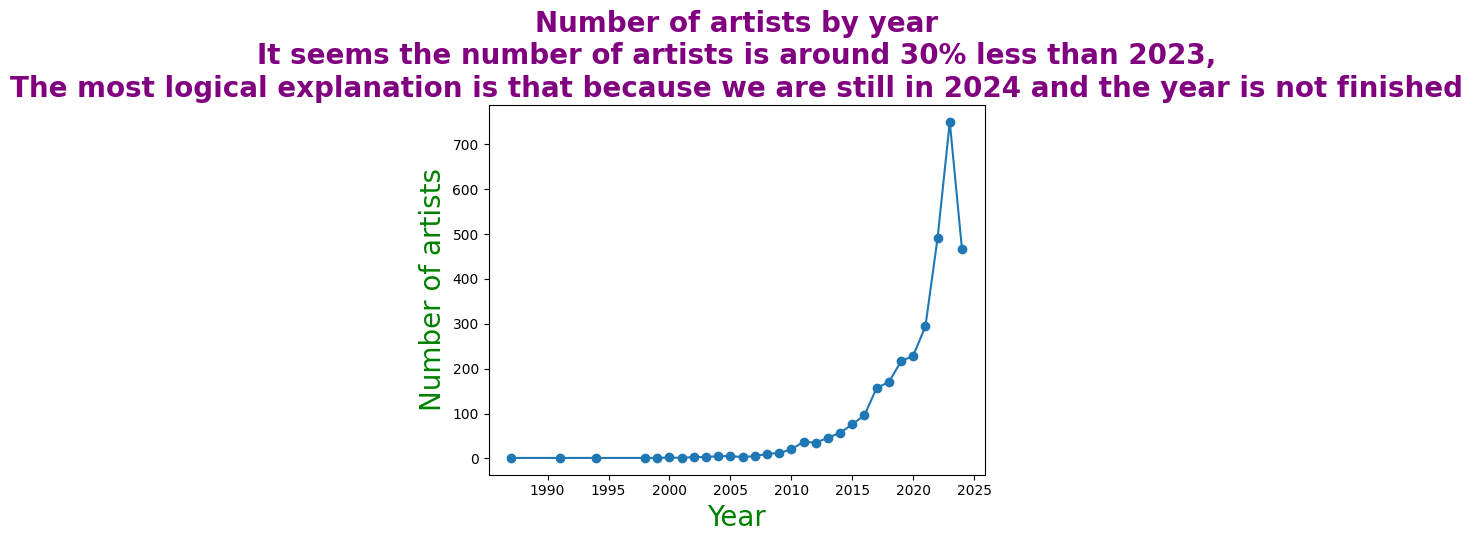

In [207]:
number_of_artists_by_year = data_edited.groupby('year')['artist'].nunique().sort_index()
plt.plot(number_of_artists_by_year, marker="o")
plt.title("Number of artists by year\nIt seems the number of artists is around 30% less than 2023,\nThe most logical explanation is that because we are still in 2024 and the year is not finished", fontsize=20, color="purple", fontweight="bold")
plt.xlabel("Year", fontsize=20, color="green")
plt.ylabel("Number of artists", fontsize=20, color="green")

(array([250., 300., 350., 400., 450., 500., 550.]),
 [Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450'),
  Text(0, 500.0, '500'),
  Text(0, 550.0, '550')])

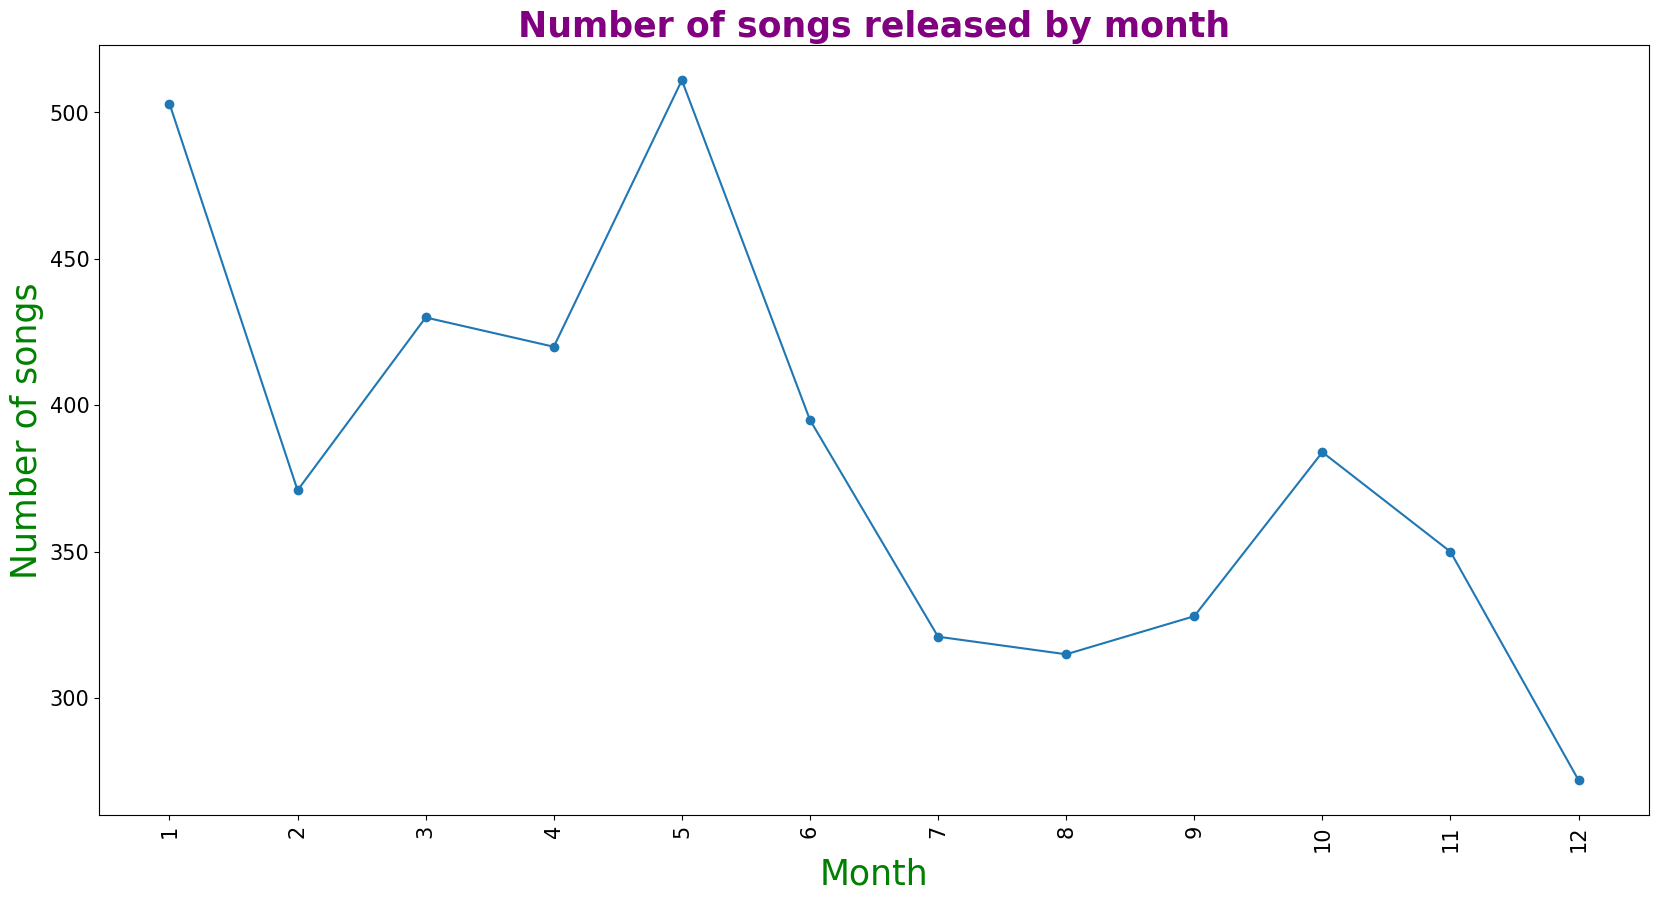

In [198]:
plt.figure(figsize=(20, 10))
plt.plot(data_edited.month.value_counts().sort_index(), marker="o")
plt.title("Number of songs released by month", fontsize=25, color="purple", fontweight="bold")
plt.xlabel("Month", fontsize=25, color="green")
plt.ylabel("Number of songs", fontsize=25, color="green")
plt.xticks(data_edited['month'].value_counts().sort_index().index, rotation=90, fontsize=15)
plt.yticks(fontsize=15)

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [212]:
data_edited[["spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]].dtypes

spotify_playlist_count         object
apple_music_playlist_count    float64
deezer_playlist_count         float64
amazon_playlist_count         float64
dtype: object

In [213]:
data_edited.spotify_playlist_count = data_edited.spotify_playlist_count.str.replace(",", "").astype(float)

In [215]:
data_edited[["spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]].corr()

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
spotify_playlist_count,1.000000,0.685886,0.560208,0.382226
apple_music_playlist_count,0.685886,1.000000,0.775710,0.665635
deezer_playlist_count,0.560208,0.775710,1.000000,0.568904
amazon_playlist_count,0.382226,0.665635,0.568904,1.000000


In [218]:
data_edited[["spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]].corr()

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
spotify_playlist_count,1.000000,0.685886,0.560208,0.382226
apple_music_playlist_count,0.685886,1.000000,0.775710,0.665635
deezer_playlist_count,0.560208,0.775710,1.000000,0.568904
amazon_playlist_count,0.382226,0.665635,0.568904,1.000000


### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [230]:
data_edited[["youtube_views", "youtube_likes"]]

,youtube_views,youtube_likes
0,"84,274,754","1,713,126"
1,"116,347,040","3,486,739"
2,"122,599,116","2,228,730"
3,"1,096,100,899","10,629,796"
4,"77,373,957","3,670,188"
...,...,...
4595,"149,247,747","1,397,590"
4596,"943,920,245","5,347,766"
4597,"201,027,333","1,081,402"
4598,"1,118,595,159","3,868,828"


In [233]:
data_edited.youtube_views = data_edited.youtube_views.str.replace(",", "").astype(float)
data_edited.youtube_likes = data_edited.youtube_likes.str.replace(",", "").astype(float)

In [234]:
data_edited[["youtube_views", "youtube_likes"]].corr()

,youtube_views,youtube_likes
youtube_views,1.000000,0.833897
youtube_likes,0.833897,1.000000


Text(0, 0.5, 'YouTube likes')

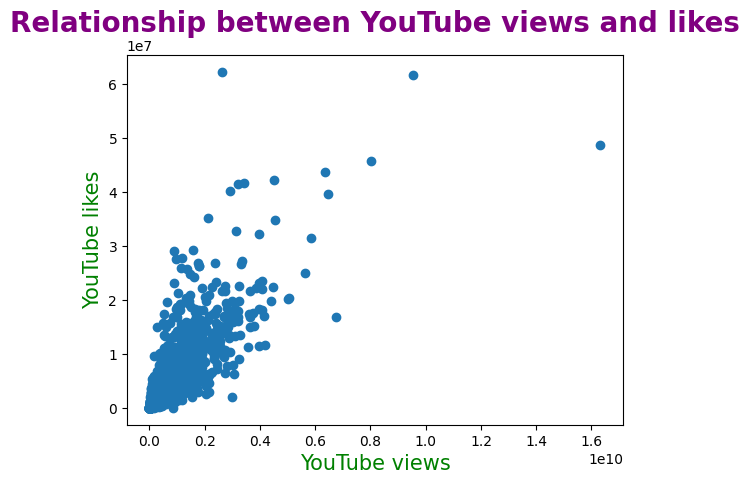

In [237]:
plt.scatter(data_edited.youtube_views, data_edited.youtube_likes)
plt.title("Relationship between YouTube views and likes", fontsize=20, color="purple", fontweight="bold")
plt.xlabel("YouTube views", fontsize=15, color="green")
plt.ylabel("YouTube likes", fontsize=15, color="green")

In [240]:
print("Mean YouTube views-to-likes ratio:")
(data_edited['youtube_views'] / data_edited['youtube_likes']).mean()

Mean YouTube views-to-likes ratio:


169.11611317907185

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [254]:
data_edited.tiktok_views.dtype

dtype('float64')

In [255]:
data_edited.year.dtype

dtype('int32')

In [273]:
views_by_year = data_edited.groupby('year')['tiktok_views'].sum()
views_by_year

year
1987    6.732824e+08
1991    7.202839e+08
1994    1.596313e+10
1998    8.037196e+08
1999    2.260081e+08
2000    1.500549e+09
2001    1.670324e+08
2002    1.102066e+09
2003    2.791915e+09
2004    2.262405e+09
2005    2.223954e+11
2006    2.633024e+09
2007    4.439372e+09
2008    1.023595e+10
2009    9.018975e+09
2010    2.205043e+10
2011    2.735425e+11
2012    2.448542e+10
2013    6.667524e+10
2014    5.564570e+10
2015    7.070100e+10
2016    7.833032e+10
2017    1.743629e+11
2018    2.676612e+11
2019    3.942107e+11
2020    5.331919e+11
2021    6.311775e+11
2022    8.329750e+11
2023    4.548162e+11
2024    4.747097e+10
Name: tiktok_views, dtype: float64

In [274]:
views_by_year.idxmax()

2022

In [271]:
views_by_year.max()

832975012888.0

In [275]:
views_by_year.sort_values(ascending=False)

year
2022    8.329750e+11
2021    6.311775e+11
2020    5.331919e+11
2023    4.548162e+11
2019    3.942107e+11
2011    2.735425e+11
2018    2.676612e+11
2005    2.223954e+11
2017    1.743629e+11
2016    7.833032e+10
2015    7.070100e+10
2013    6.667524e+10
2014    5.564570e+10
2024    4.747097e+10
2012    2.448542e+10
2010    2.205043e+10
1994    1.596313e+10
2008    1.023595e+10
2009    9.018975e+09
2007    4.439372e+09
2003    2.791915e+09
2006    2.633024e+09
2004    2.262405e+09
2000    1.500549e+09
2002    1.102066e+09
1998    8.037196e+08
1991    7.202839e+08
1987    6.732824e+08
1999    2.260081e+08
2001    1.670324e+08
Name: tiktok_views, dtype: float64

Text(2022, 832975012888.0, '2022')

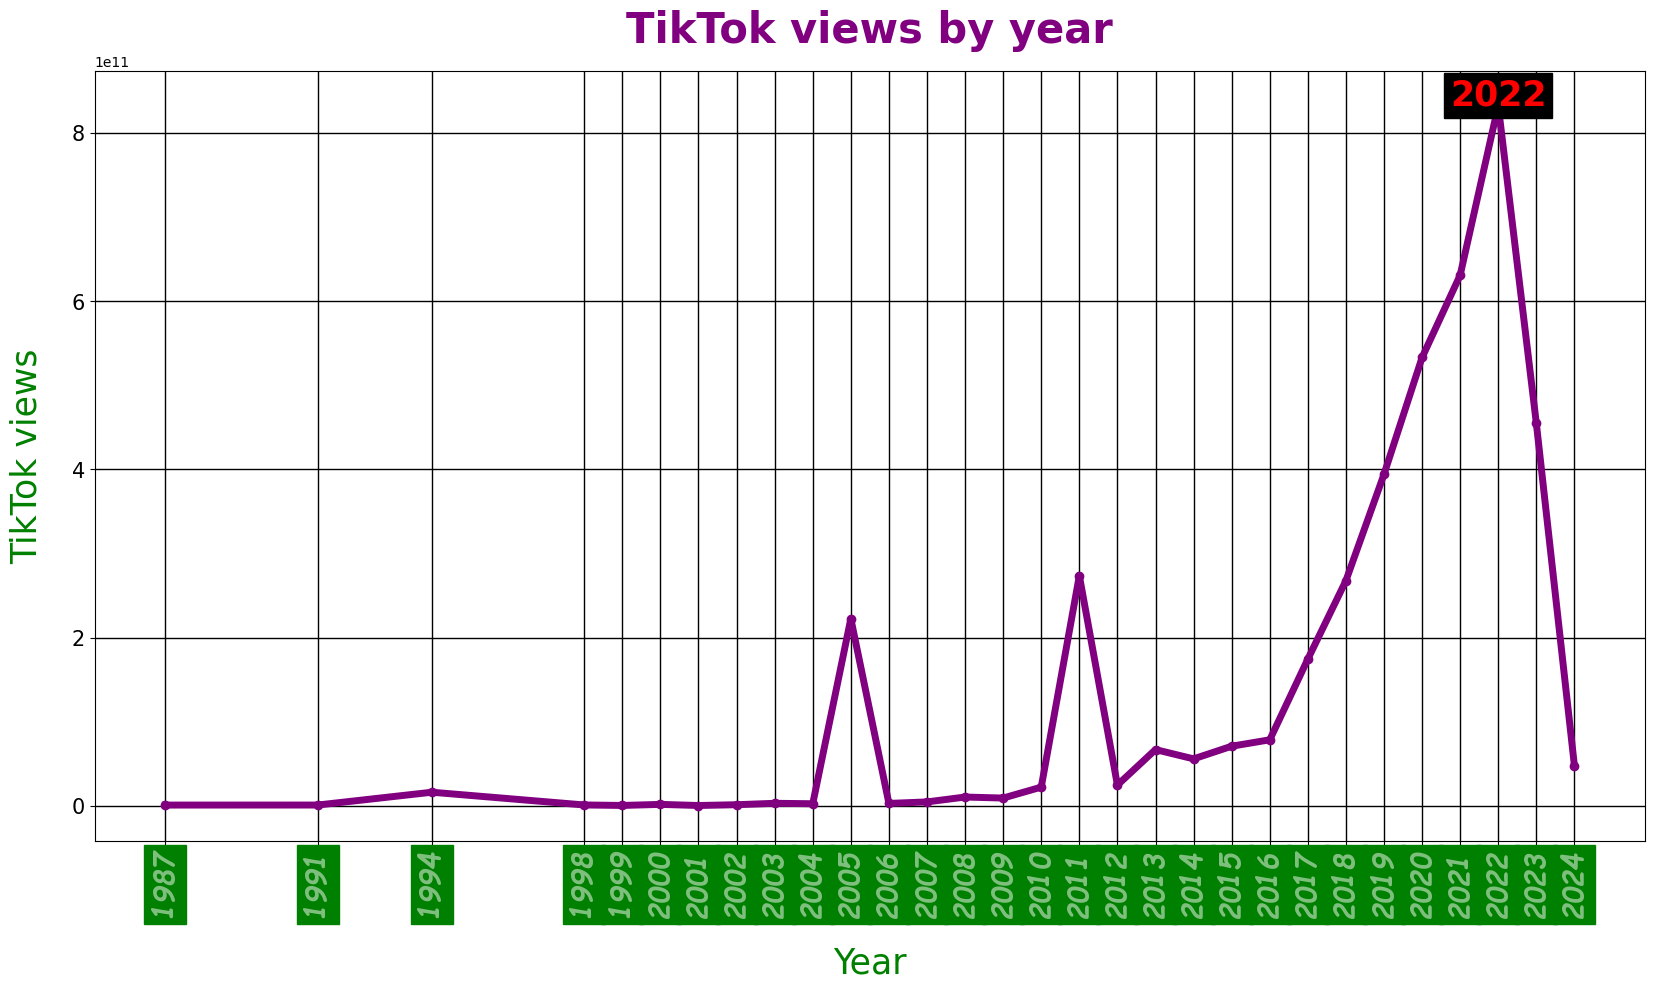

In [329]:
plt.figure(figsize=(20, 10))
plt.plot(views_by_year, marker="o", color="purple", linewidth=5)
plt.title("TikTok views by year", fontsize=30, color="purple", fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=25, color="green", labelpad=20)
plt.ylabel("TikTok views", fontsize=25, color="green", labelpad=20)
plt.yticks(fontsize=15)
plt.xticks(views_by_year.index, fontsize=20, rotation=90, color="white", fontweight="bold", fontstyle="italic", fontfamily="monospace", fontname="Comic Sans MS", alpha=0.5, backgroundcolor="green", zorder=5, weight="bold", )
plt.grid(True, linewidth=1, color="black")
plt.text(views_by_year.idxmax(), views_by_year.max(), f"{views_by_year.idxmax()}", fontsize=25, color="red", fontweight="bold", backgroundcolor="black", ha="center")
# plt.xticks(data_edited['month'].value_counts().sort_index().index, rotation=90, fontsize=15)

In [339]:
all_years = data_edited["year"].unique()
all_years

array([2024, 2023, 2022, 2021, 2015, 2019, 2017, 2020, 2018, 2016, 2011,
       2013, 2014, 2012, 2010, 2009, 2000, 2005, 2004, 1994, 2008, 2002,
       2007, 2003, 2006, 1999, 1987, 1998, 2001, 1991])

    year           track  tiktok_views
23  2024  TEXAS HOLD 'EM  6.518604e+09
   year    track  tiktok_views
3  2023  Flowers  1.460373e+10
     year      track  tiktok_views
113  2022  Aesthetic  3.387079e+10
    year                      track  tiktok_views
26  2021  STAY (with Justin Bieber)  2.371238e+10
    year       track  tiktok_views
27  2015  Baby Shark  6.577639e+09
     year  track  tiktok_views
474  2019  Oh No  6.108856e+10
      year     track  tiktok_views
1145  2017  Infinity  2.224110e+10
      year      track  tiktok_views
3377  2020  Spongebob  3.335940e+10
      year       track  tiktok_views
1547  2018  Funny Song  3.837364e+10
     year        track  tiktok_views
550  2016  Unstoppable  1.480889e+10
      year                     track  tiktok_views
1024  2011  Monkeys Spinning Monkeys  2.332323e+11
      year               track  tiktok_views
4222  2013  Ginseng Strip 2002  1.775926e+10
      year  track  tiktok_views
4228  2014  Title  1.101892e+10
      year  

ValueError: left cannot be >= right

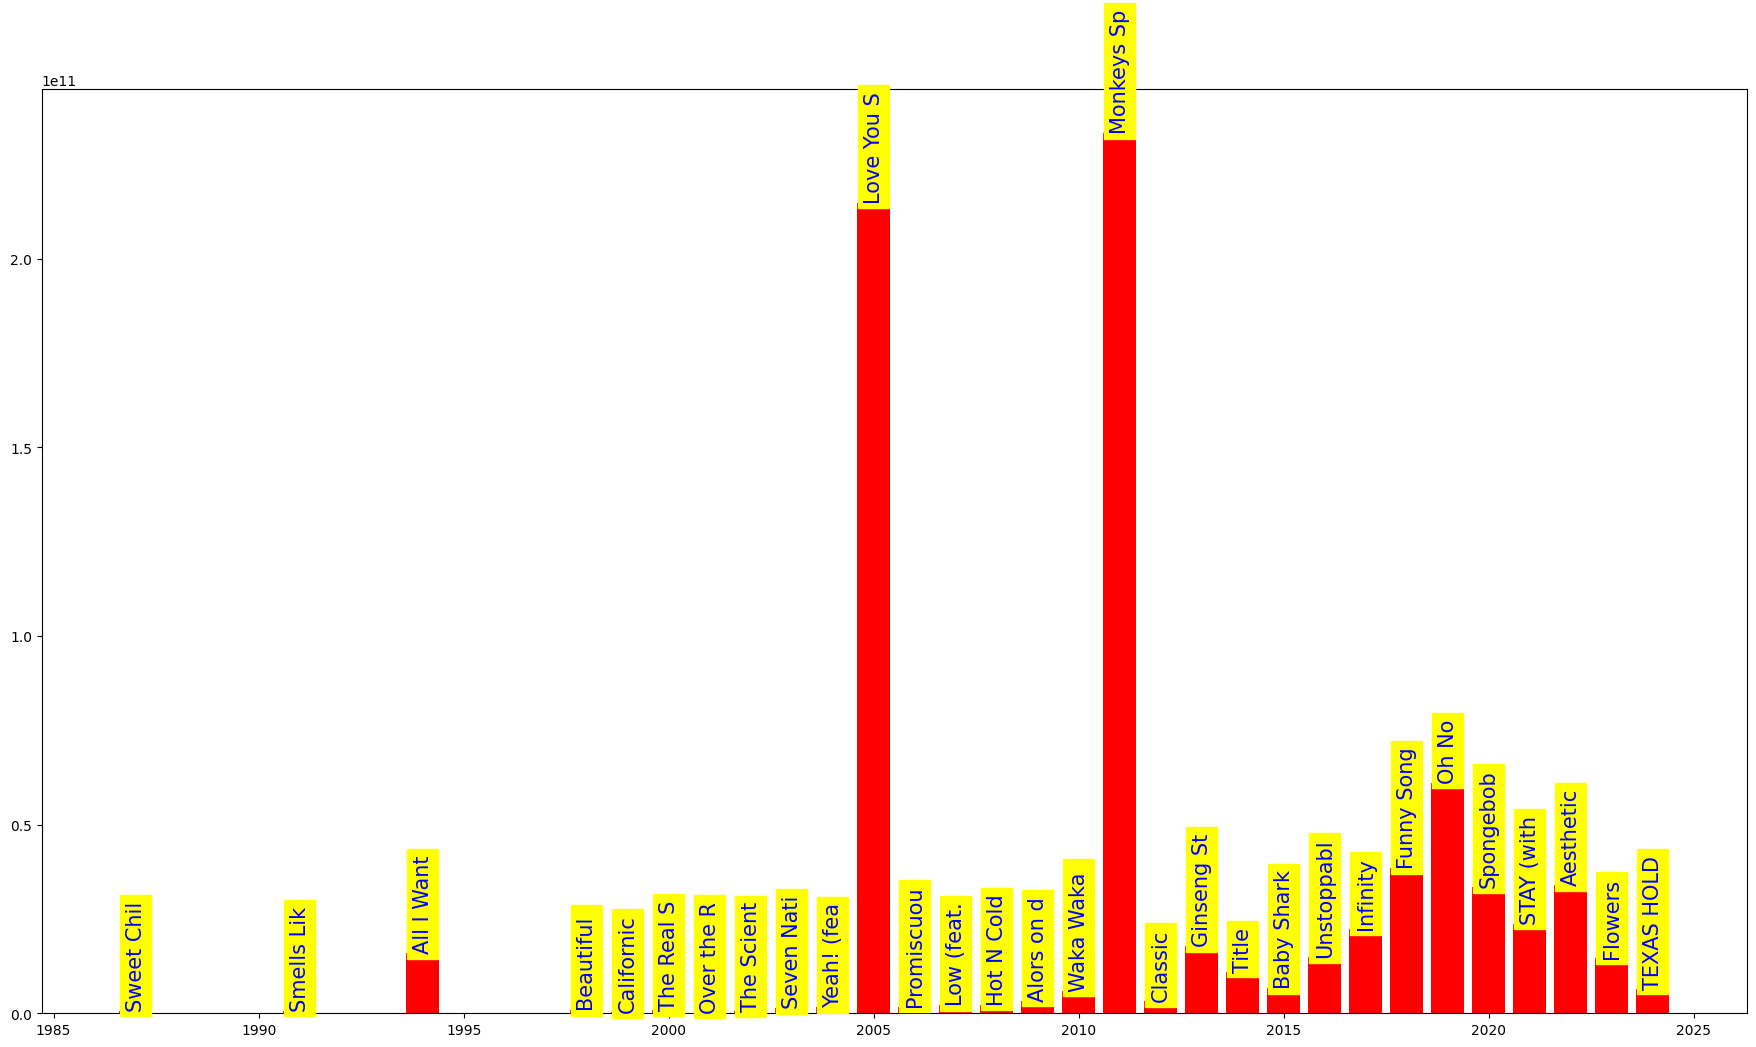

In [381]:
plt.figure(figsize=(22, 12))
for year in data_edited["year"].unique():
    print(data_edited[data_edited["year"] == year].sort_values("tiktok_views", ascending=False).head(1)[["year", "track", "tiktok_views"]])
    track_name = data_edited[data_edited["year"] == year].sort_values("tiktok_views", ascending=False).head(1)["track"].values[0]
    ticktok_views = data_edited[data_edited["year"] == year].sort_values("tiktok_views", ascending=False).head(1)["tiktok_views"].values[0]
    
    plt.bar(year, data_edited[data_edited["year"] == year].sort_values("tiktok_views", ascending=False).head(1)["tiktok_views"], color="red")
    plt.text(year, ticktok_views , f"{track_name[:10]}", fontsize=15, color="blue", rotation=90, ha="center", va="bottom", backgroundcolor="yellow")
plt.title("Most popular song by year", fontsize=20, color="purple", fontweight="bold")
plt.xlabel("Year", fontsize=15, color="green")
plt.ylabel("TikTok views", fontsize=15, color="green")



### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.

In [382]:
data_edited.to_csv("data/Most Streamed Spotify Songs 2024 Edited.csv", index=False)